<a href="https://colab.research.google.com/github/cadyngo/EAS-Math-for-AI/blob/main/basics_of_lin_algb_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics of Linear Algebra for Machine Learning



## 1. Why Linear Algebra?
Machine learning pipelines rely heavily on fast linear algebra operations—especially matrix multiplication.  For instance,

- Datasets are stored as matrices (rows = samples, columns = features).
- Model parameters are vectors and matrices.
- Training = repeated matrix multiplications.
- Optimization (SGD, Adam) requires vector derivatives.
- GPU acceleration works because all operations are linear algebra kernels.


### Why vectorization matters
When computing predictions over millions of data points, Python loops are too slow. Vectorized NumPy operations are dramatically faster because they use optimized low-level C/Fortran code.

Below, we'll reproduce the timing experiment from the slides.


In [ ]:
import numpy as np, time
m = np.random.rand(1,5)
x = np.random.rand(500000,5)

start = time.time()
out=[]
for i in range(len(x)):
    s=0
    for j in range(5):
        s += x[i,j]*m[0,j]
    out.append(s)
print("Loop time:", time.time()-start)


Loop time: 6.27739405632019


### Vectorized version
Now we compute the same thing using a single matrix multiplication, which NumPy optimizes heavily.

In [ ]:
start=time.time()
out2 = x @ m.T
print("Vectorized time:", time.time()-start)


Vectorized time: 0.053452491760253906


You should see a huge speed improvement, illustrating why linear algebra is the backbone of ML computations.

## 2. Vector Spaces & Subspaces
A vector space is a set of objects that you can add together and scale, and the result always stays in the set. ML models operate in vector spaces such as $\mathbb{R}$

A subspace must:
- contain the zero vector
- be closed under vector addition
- be closed under scalar multiplication

The function below helps test whether a finite set of vectors forms a subspace. Try modifying the set to see which collections fail the subspace criteria and why.

In [ ]:

def is_subspace(U):
    U=[np.array(u) for u in U]
    if not any((u==0).all() for u in U):
        return False
    for u in U:
        for v in U:
            if not any(np.all(u+v==w) for w in U): return False
            for a in [-1,0.5,2]:
                if not any(np.all(a*u==w) for w in U): return False
    return True

U=[np.array([0,0]), np.array([1,1])]
is_subspace(U)


False

Notice how this fails: although it contains the zero vector, it is not closed under scalar multiplication (e.g., 2·[1,1] is not in U)

## 3. Linear Combinations
Many ML concepts—like representing features or reconstructing signals—use linear combinations.

Here, we solve for coefficients $\lambda$ such that:

$$
v = \lambda_1 x_1 + \lambda_2 x_2 + \lambda_3 x_3
$$

NumPy's least squares solver finds these coefficients.

In [ ]:

x1=np.array([1,2,-1])
x2=np.array([0,1,3])
x3=np.array([1,1,1])
X=np.vstack([x1,x2,x3]).T
v=np.array([4,7,2])
np.linalg.lstsq(X,v,rcond=None)[0]


array([2.2, 0.8, 1.8])

This shows one way to express a target vector in terms of others if possible.

## 4. Linear Independence
Vectors are linearly independent if none can be written as a combination of the others. In ML, independence implies no redundant features.

We check independence using the rank of a matrix whose columns are the vectors.

In [ ]:

def independent(vecs):
    A=np.vstack(vecs).T
    return np.linalg.matrix_rank(A)==len(vecs)

v1=np.array([1,2,3])
v2=np.array([2,4,6])
v3=np.array([1,0,1])
independent([v1,v2,v3])


np.False_

Because $v_2$ is a multiple of $v_1$, the set is linearly dependent.


Here we plot the above vectors and can see how $v_1$ and $v_2$ are linearly dependent, since they lie on the same line and point in the same direction.


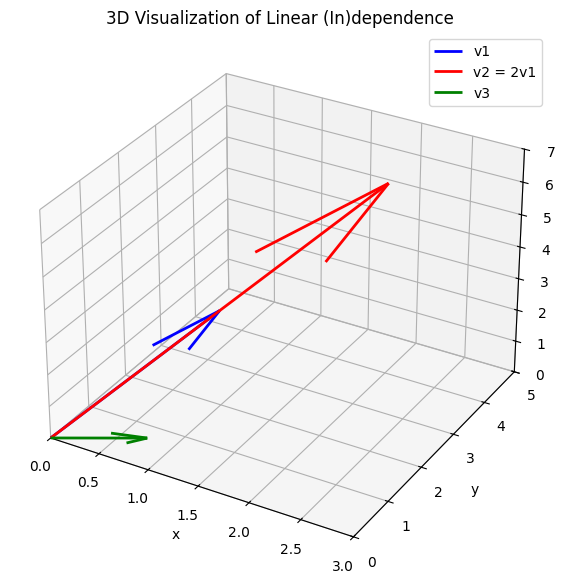

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='blue', linewidth=2, label="v1")
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='red', linewidth=2, label="v2 = 2v1")
ax.quiver(0, 0, 0, v3[0], v3[1], v3[2], color='green', linewidth=2, label="v3")


ax.set_xlim([0, 3])
ax.set_ylim([0, 5])
ax.set_zlim([0, 7])

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_title("3D Visualization of Linear (In)dependence")

ax.legend()
plt.show()


## 5. Basis & Dimension
A  basis is a minimal set of linearly independent vectors that span a space.

Here, we evaluate the rank (dimension of the span) of four 5D vectors ( like the slide example).

In [ ]:

x1=np.array([1,2,-1,-1,-1])
x2=np.array([2,-1,1,2,-2])
x3=np.array([3,-4,3,5,-3])
x4=np.array([-1,8,-5,-6,1])
X=np.vstack([x1,x2,x3,x4]).T
rank=np.linalg.matrix_rank(X)
print("Rank", rank)


Rank 3


To get an actual basis, we extract the pivot columns using SymPy:

In [ ]:

from sympy import Matrix
Matrix(X).columnspace()


[Matrix([
 [ 1],
 [ 2],
 [-1],
 [-1],
 [-1]]),
 Matrix([
 [ 2],
 [-1],
 [ 1],
 [ 2],
 [-2]]),
 Matrix([
 [-1],
 [ 8],
 [-5],
 [-6],
 [ 1]])]

The resulting vectors form a basis for the span of ${x_1,x_2,x_3,x_4}$.


## 6. Rank & Nullspace
The rank of a matrix tells us how many independent columns it has.
The nullspace captures all solutions to $Ax = 0$, representing the directions that the transformation collapses.

We explore both using the mapping from the slides.

In [ ]:

from sympy import Matrix
A=np.array([[1,2,-1,0],[1,0,0,1]])
Matrix(A).nullspace()


[Matrix([
 [  0],
 [1/2],
 [  1],
 [  0]]),
 Matrix([
 [ -1],
 [1/2],
 [  0],
 [  1]])]

The resulting vectors describe all inputs that map to zero—a concept crucial for understanding underdetermined systems.


## 7. Linear Mappings
A linear map preserves vector space structure. In ML, weight matrices in neural networks behave exactly like these transformations.

We evaluate the transformation \(Ax\) on a random vector.

In [ ]:

A=np.array([[1,2,-1,0],[1,0,0,1]])
x=np.random.randn(4)
A@x


array([1.9752585 , 0.77029717])

The output lives in $\mathbb{R}^2$, since A is a 2×4 matrix.


## 8. Norms


A norm is a function that measures the “size” or “length” of a vector.  
In machine learning, norms are essential for regularization, optimization stability, and understanding geometry in high-dimensional spaces.

Below are the most commonly used norms:


#### L1 norm (Manhattan distance)
$$
\|x\|_1 = \sum_{i=1}^{n} |x_i|
$$

Intuition: counts total absolute deviation.  
ML use: promotes sparsity (Lasso), feature selection.



####L2 norm (Euclidean length)
$$
\|x\|_2 = \sqrt{\sum_{i=1}^{n} x_i^2}
$$

Often the squared form is used:
$$
\|x\|_2^2 = \sum_{i=1}^{n} x_i^2
$$

Intuition: standard geometric distance.  
ML use: smooth penalty encouraging small weights (Ridge regression).



#### L∞ norm (Maximum coordinate)**
$$
\|x\|_\infty = \max_{i} |x_i|
$$

Intuition: dominated by the largest component.  
ML use: adversarial robustness, bounding worst-case perturbations.



#### In summary
- L1 → sparsity  
- L2 → smoothness  
- L∞ → robustness to worst-case noise

These norms generalize the idea of vector length and serve as building blocks for many ML optimization algorithms.


In [ ]:

x=np.array([3,-4,1])
np.linalg.norm(x,1), np.linalg.norm(x,2), np.linalg.norm(x,np.inf)


(np.float64(8.0), np.float64(5.0990195135927845), np.float64(4.0))

Observe how changing the norm changes the emphasis. For instance, L∞ cares only about the largest component.


## 9. Inner Products & Angles
The dot product generalizes to inner products, giving us geometric notions like angles. Cosine similarity is widely used in embeddings and NLP.


In [ ]:

x=np.array([1,2]); y=np.array([3,-1])
dot=x@y
angle=np.arccos(dot/(np.linalg.norm(x)*np.linalg.norm(y)))
dot, angle


(np.int64(1), np.float64(1.4288992721907328))

A small angle means the vectors point in similar directions — a key idea in representation learning. When two embeddings have a small angle between them, it indicates that the model considers them semantically similar. This is exactly why cosine similarity is used in NLP, vision-language models, and large embedding spaces: the magnitude of the vector doesn't matter as much as its direction, which captures the underlying semantic concept or meaning. In high-dimensional spaces, angles provide a stable way to measure similarity even when vector lengths vary due training dynamics.

## 10. Student Exercises

### Exercise 1 — Embedding Similarity & Linear Dependence

You're given 4-dimensional embeddings:

$$
w_{\text{cat}} = \begin{bmatrix} 1 \\ 2 \\ -1 \\ 0 \end{bmatrix},\quad
w_{\text{dog}} = \begin{bmatrix} 2 \\ 4 \\ -2 \\ 0 \end{bmatrix},\quad
w_{\text{car}} = \begin{bmatrix} 3 \\ -1 \\ 0 \\ 5 \end{bmatrix}.
$$

(a) Are any embeddings linearly dependent?

(b) Compute cosine similarities:
- cat vs. dog  
- cat vs. car

(c) Interpret the results in terms of semantic similarity.


In [ ]:
# TODO: Exercise 1

### Exercise 2 — Angle Between Embeddings & Semantic Meaning

You're given three 3-dimensional embeddings:

$$
u = [1,\; 3,\; -1], \quad v = [-2,\; -6,\; 2], \quad w = [4,\; 1,\; 0].
$$

(a) Compute the angle (in degrees) between:
- $u $ and $v$
- $ u $ and $ w $

Use the formula:
$$
\theta = \cos^{-1}\!\left(\frac{u \cdot v}{\|u\| \|v\|}\right)
$$

(b) Interpret whether $u$ and $v$ encode similar or opposite semantics.

(c) Discuss why angles (not raw dot products) are more stable in high-dimensional embedding spaces.


In [ ]:
# TODO: Exercise 2

### Exercise 3 — Linear Independence & Span in Embedding Spaces

Consider the following set of 3-dimensional vectors:

$$
u = [1,\; 2,\; 3], \quad
v = [2,\; 4,\; 6], \quad
w = [1,\; 0,\; 1].
$$

(a) Determine whether the set $\{u, v, w\}$ is linearly independent.

(b) Form the matrix:
$$
A = [u \; v \; w]
$$
and compute its rank.

(c) Explain why linear independence controls the dimensionality of the “semantic subspace” spanned by an embedding set.

(d) Identify which vectors lie in the span of others, and explain why.



In [ ]:
# TODO: Exercise 3